In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
df = pd.read_csv("dataset.csv")

In [4]:
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
print(df.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [12]:
le = LabelEncoder()
for col in df.select_dtypes(include= 'object').columns:
    df[col] = le.fit_transform(df[col])

In [13]:
df.fillna(df.median(numeric_only=True),inplace = True)

In [23]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

In [33]:
print("logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))

logistic Regression Accuracy: 0.34776437189496096


In [35]:
print(confusion_matrix(y_test, y_pred_log))

[[152 884]
 [ 35 338]]


In [36]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.81      0.15      0.25      1036
           1       0.28      0.91      0.42       373

    accuracy                           0.35      1409
   macro avg       0.54      0.53      0.34      1409
weighted avg       0.67      0.35      0.29      1409



In [37]:
params = {
    'max_depth':[3,5,10,None],
    'min_samples_split':[2,5,10]
}

In [39]:
tree_model= GridSearchCV(DecisionTreeClassifier(random_state=42),params,cv=5)

In [40]:
tree_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 10, None],
                         'min_samples_split': [2, 5, 10]})

In [41]:
y_pred_tree = tree_model.predict(X_test)

In [42]:
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))

Decision Tree Accuracy: 0.6557842441447835


In [44]:
print(confusion_matrix(y_test, y_pred_tree))

[[584 452]
 [ 33 340]]


In [46]:
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.95      0.56      0.71      1036
           1       0.43      0.91      0.58       373

    accuracy                           0.66      1409
   macro avg       0.69      0.74      0.65      1409
weighted avg       0.81      0.66      0.67      1409



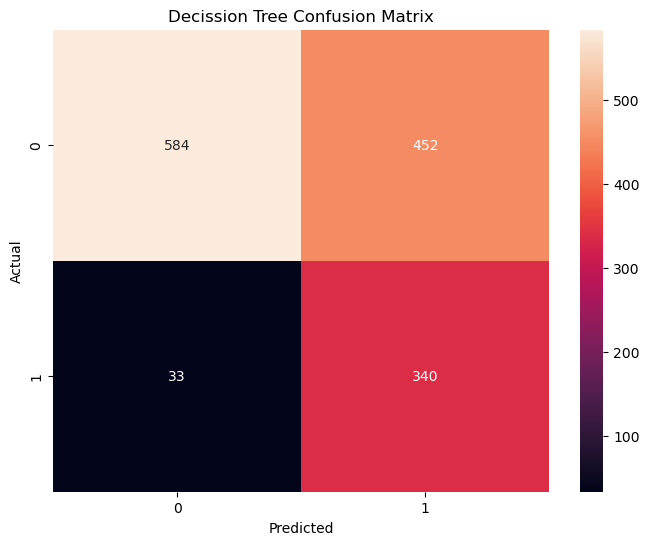

In [52]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot= True, fmt='d')
plt.title("Decission Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [58]:
importances = tree_model.best_estimator_.feature_importances_
feature_names = X.columns
sorted_idx = np.argsort(importances)[::-1]

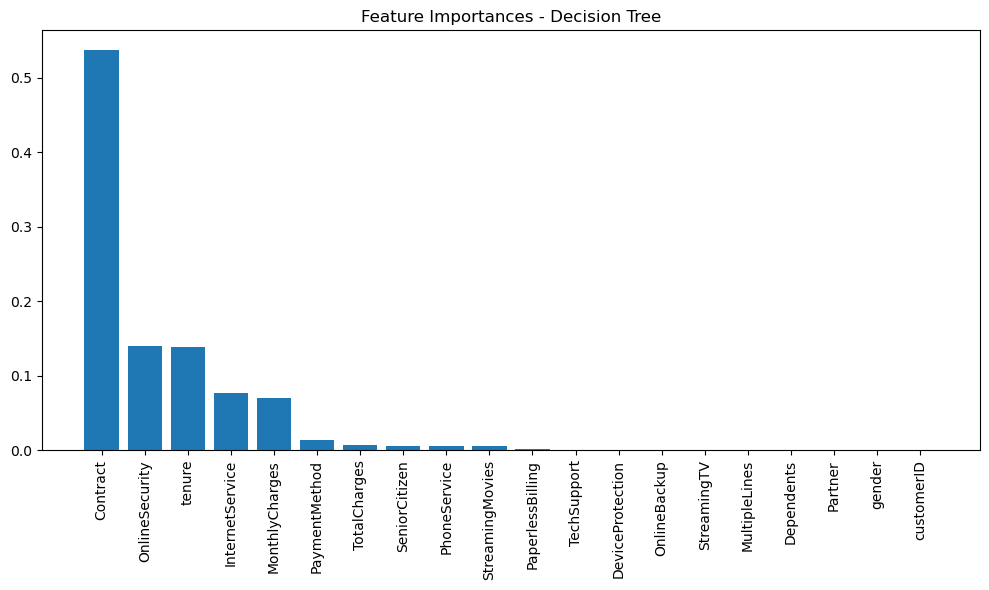

In [64]:
plt.figure(figsize=(10,6))
plt.bar(range(len(importances)), importances[sorted_idx])
plt.xticks(range(len(importances)), feature_names[sorted_idx], rotation =90)
plt.title("Feature Importances - Decision Tree")
plt.tight_layout()
plt.show()